##### Issues during the experiment:
1. The Echo log file (included) showed some missed wells
2. For two sets of two blocks I got the buffer and the protein the wrong way around, so I'll need to fix that in the code

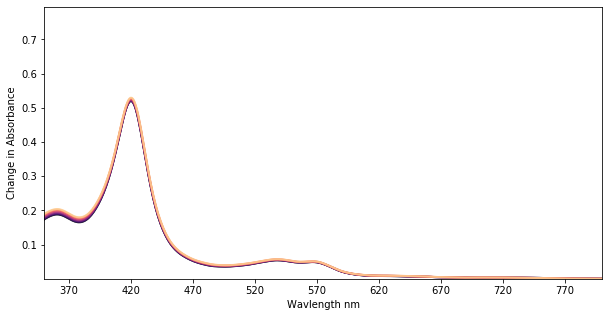

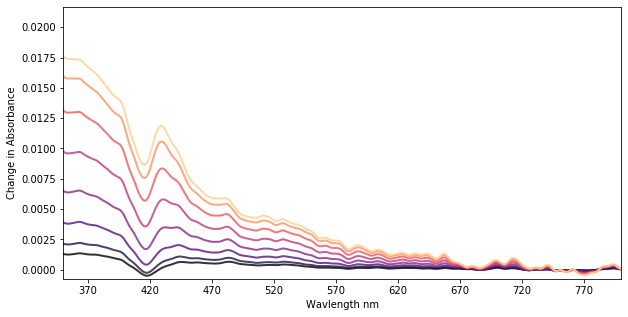

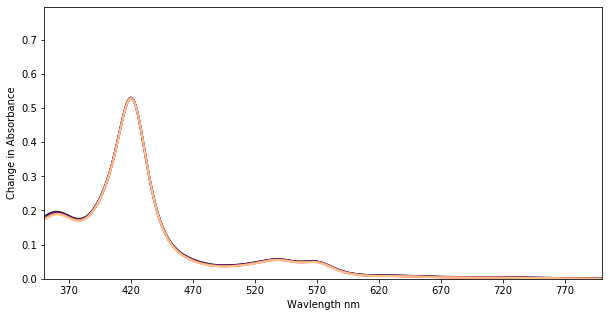

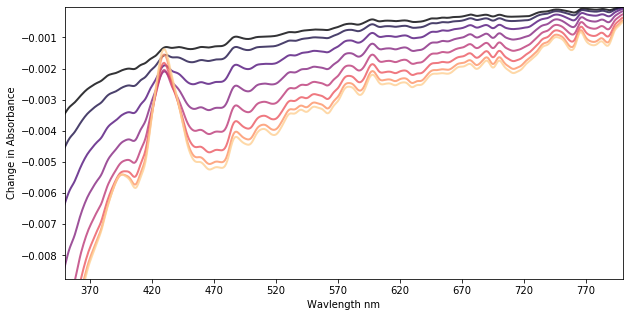

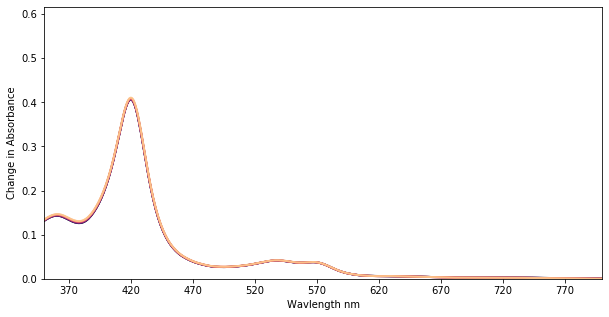

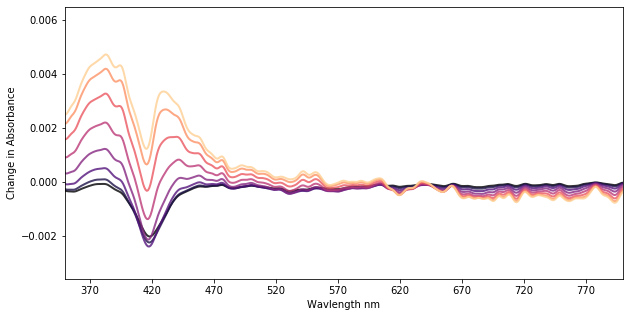

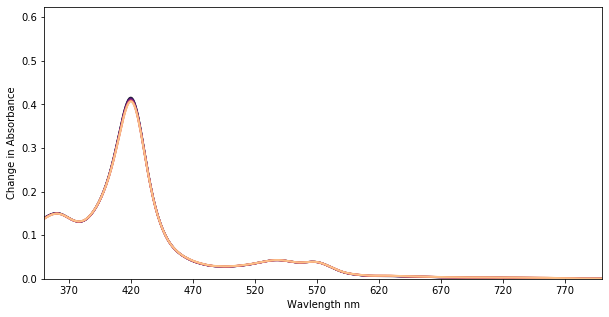

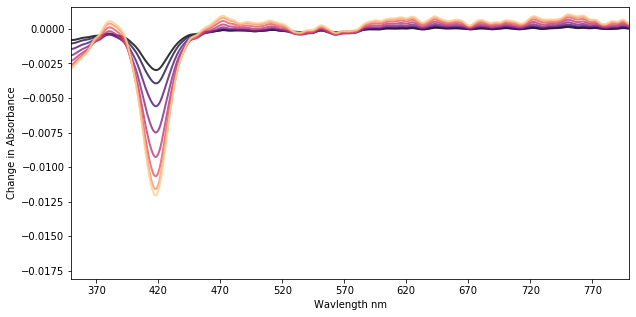

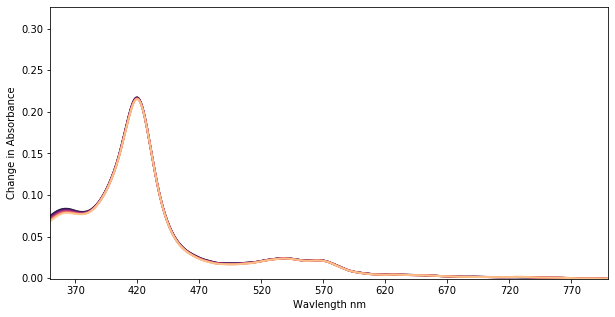

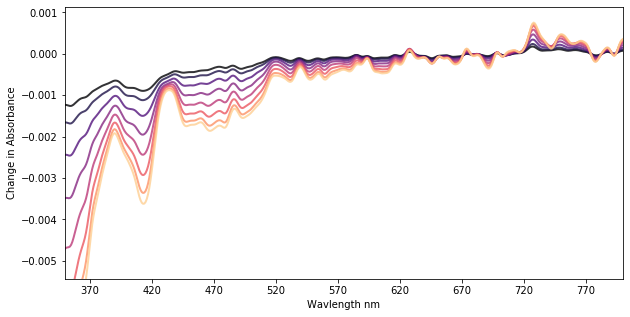

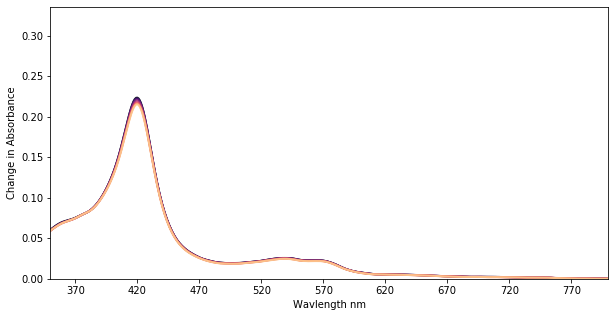

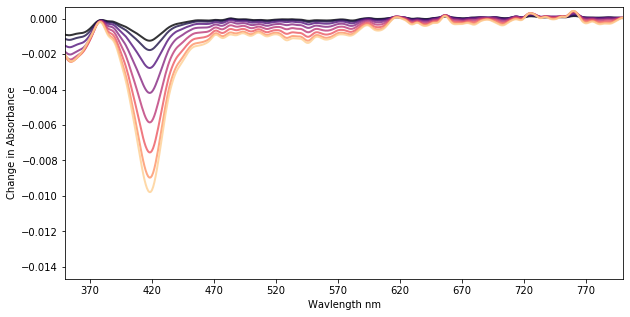

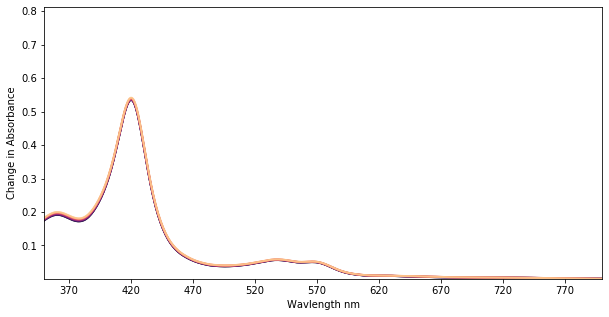

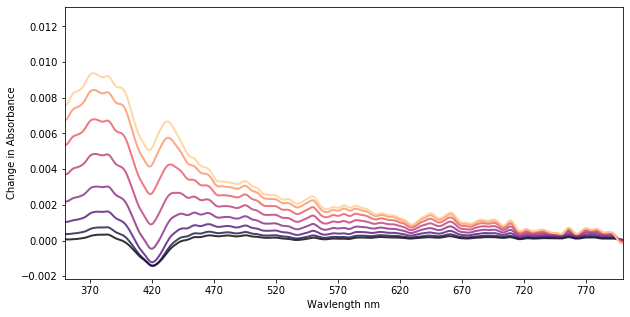

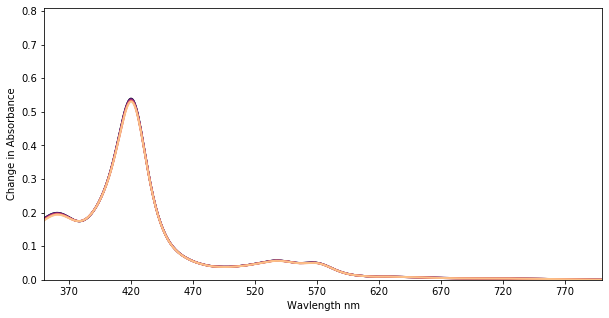

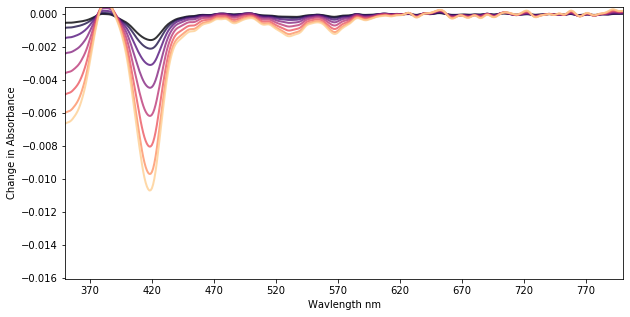

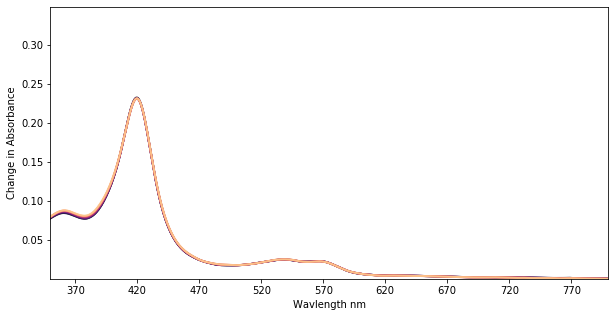

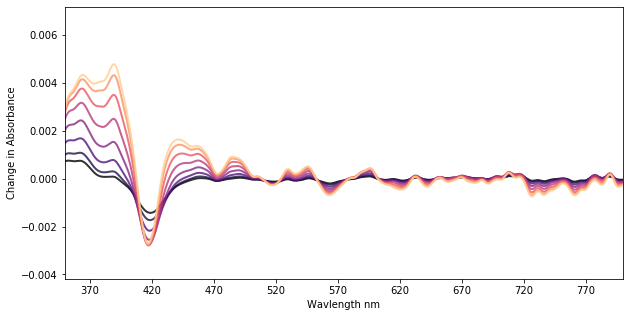

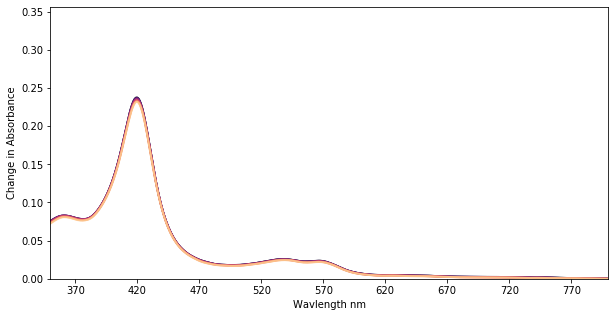

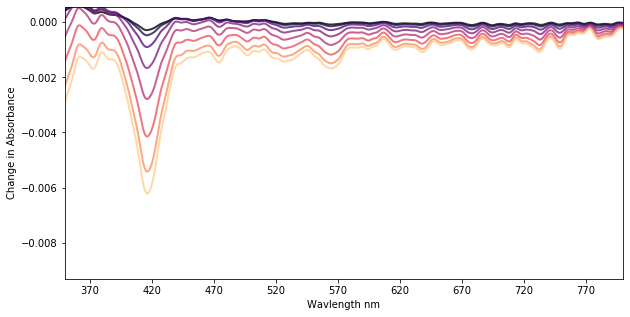

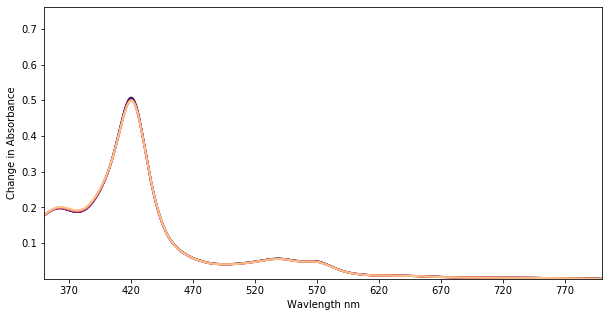

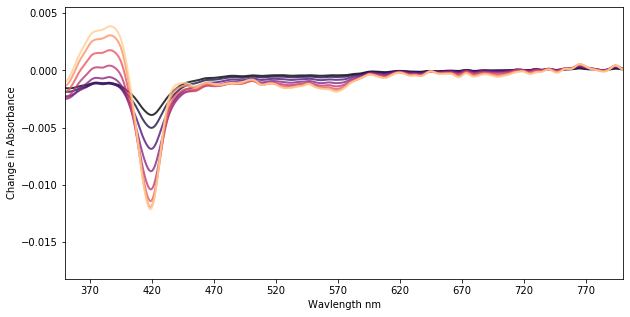

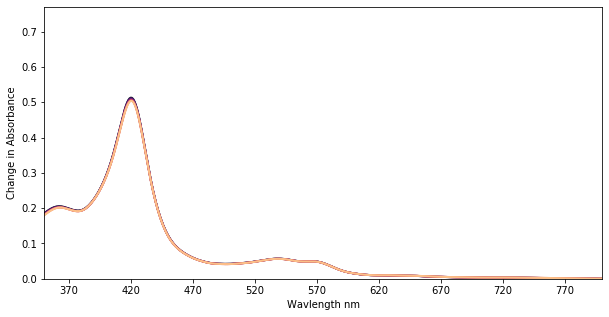

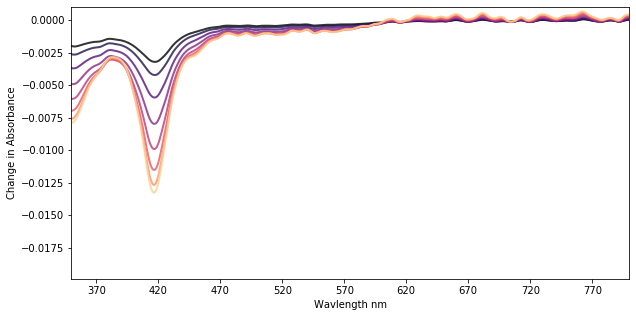

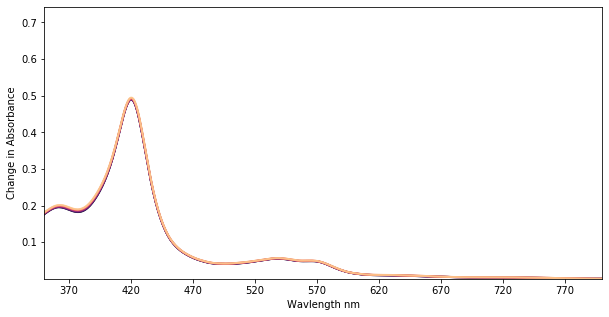

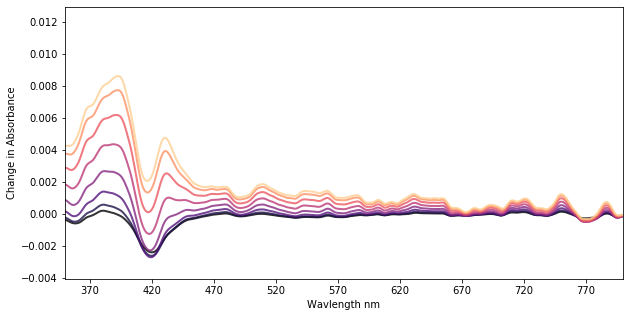

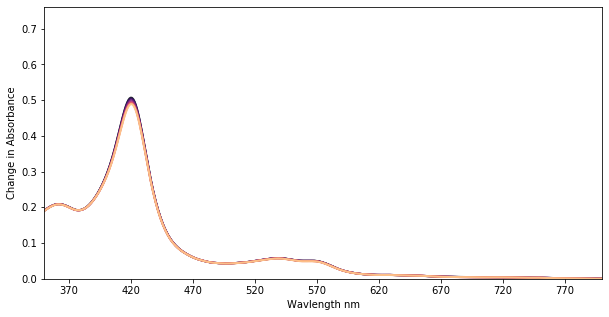

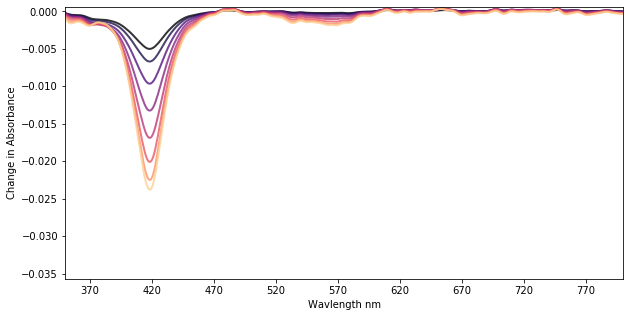

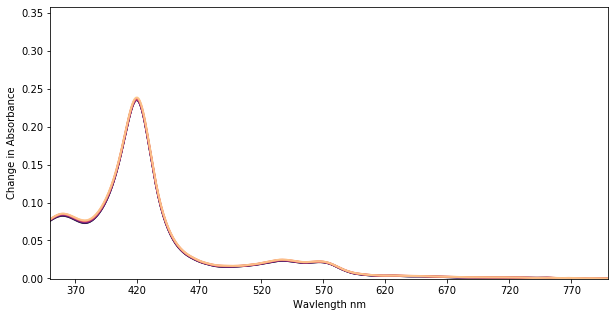

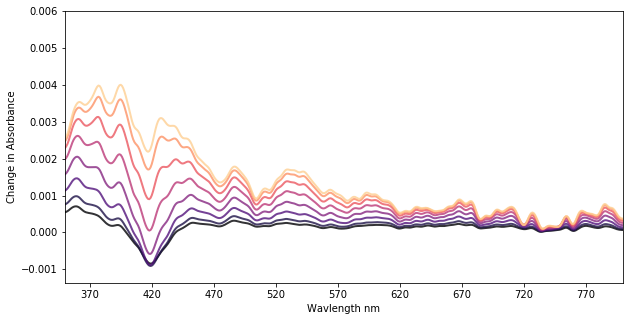

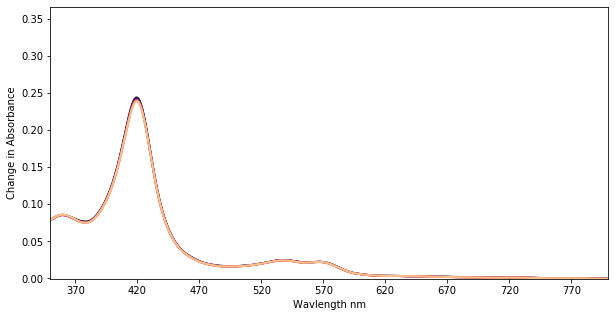

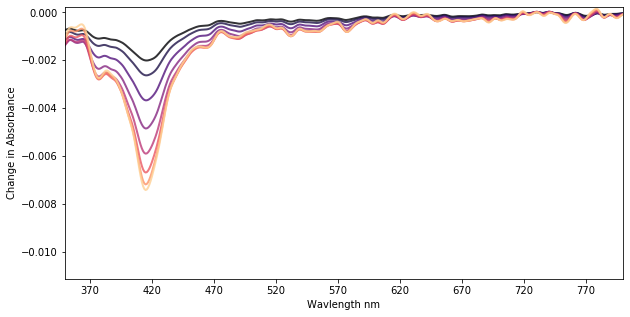

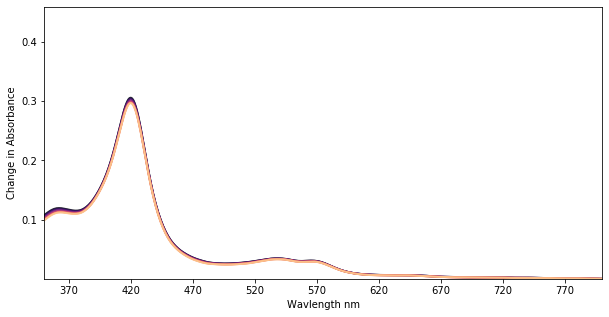

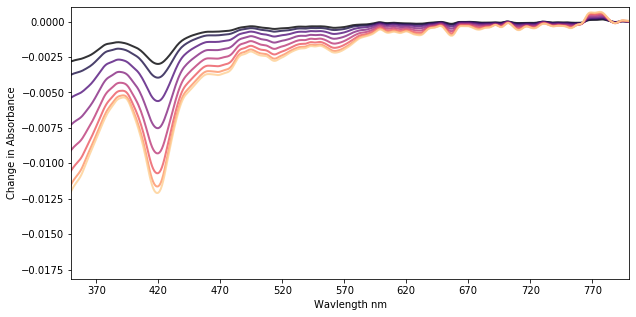

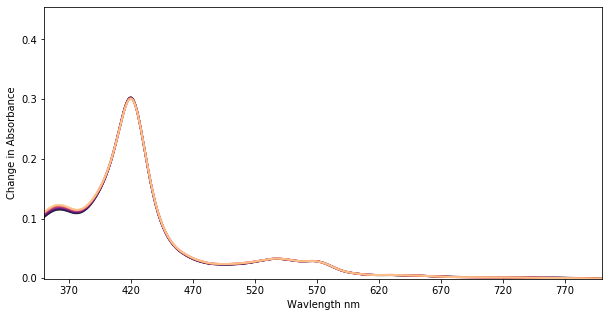

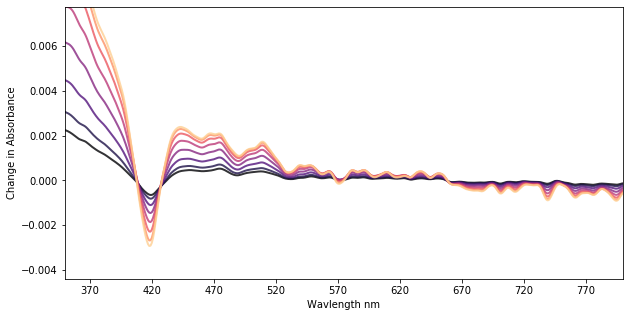

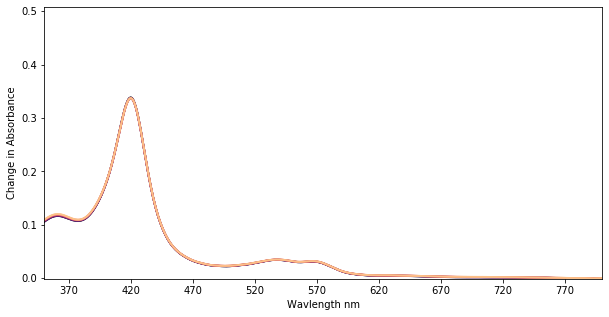

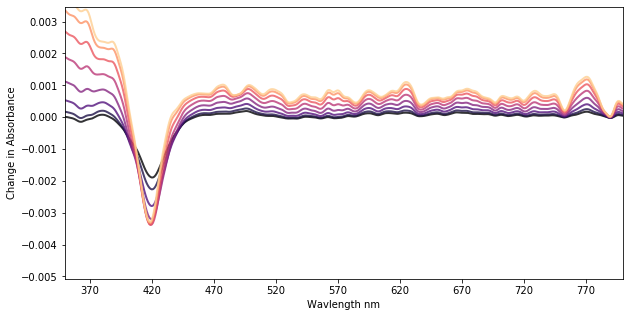

In [2]:
import pandas as pd
import numpy as np
from PlateAnalysis_Triton import PlateDataset
import matplotlib.pyplot as plt

plate = PlateDataset('20191117_Triton_Dopt.CSV')

# Keeping track of which ones I messed up
RightWayRound = {1:False,2:False,3:False,4:False,
                5:False,6:False,7:True,8:True,
                9:False,10:False,11:False,12:False,
                13:False, 14:False, 15:False, 16:False,
                17:True,18:True, 19:False,20:False}

for i in range(1,20):
    NormalizedTraces, DifferenceSpec, DiffDiff = plate.AnalysisPipeline_1(i,RightWayRound[i])
    plate.PlotTrace(NormalizedTraces)
    plate.PlotTrace(DifferenceSpec)


### Looks like nothing was dispensed
##### Or nothing was mixed

It looks like lots (but not all of the well) got dispensed

In [48]:
#Read in Echo log
log = pd.read_csv('EchoLog17thNov.txt',delimiter = '\t',header = None)
# Give columns names
log.columns = ['DateTime','??','Message Type','Message']
# Extract completed transfers by regex
transfers = log.loc[log['Message'].str.contains('Transfer Complete')]['Message']

SourceWells = transfers.str.extract('<(.*) ->')
DestWells = transfers.str.extract('-> (.*), ')

transfers=pd.concat([SourceWells,DestWells],axis=1)
transfers.columns = ['SourceWells','DestWells']
transfers

,SourceWells,DestWells
2,G9,A7
3,G9,A8
10,G10,B8
13,G10,C7
16,G10,C8
19,G10,D7
22,G10,D8
25,G10,E7
28,G10,E8
31,G11,F7


None Of the arachadionic acid dispensed :(

In [37]:
# Source wells I made 
DMSOWells = ['G'+str(i) for i in range(1,24)]+['H'+str(i) for i in range(1,10)]
ArachadionicAcidWells = ['I'+str(i) for i in range(1,19)]

print()
print(set(list(transfers['SourceWells'].unique())) & set(DMSOWells))

print('\nArachadionic acid dispenses')
print(set(list(transfers['SourceWells'].unique())) & set(ArachadionicAcidWells))


{'G19', 'G18', 'G15', 'G20', 'G10', 'H3', 'G13', 'G14', 'G16', 'G17', 'H1', 'H2', 'H6', 'G12', 'G22', 'G11', 'H4', 'G21', 'G9', 'H5', 'G23'}

Arachadionic acid dispenses
set()


In [41]:
log.loc[log['Message Type']=='WARN']['Message']

0                                       Skipping well C4
1      Problem calculating ejection offset from LUT u...
4                                       Skipping well C4
5      Problem calculating ejection offset from LUT u...
6                      Partial well transfer for well G9
7      Problem calculating ejection offset from LUT u...
8                                       Skipping well C4
9      Problem calculating ejection offset from LUT u...
11                                      Skipping well C4
12     Problem calculating ejection offset from LUT u...
14                                      Skipping well C4
15     Problem calculating ejection offset from LUT u...
17                                      Skipping well C4
18     Problem calculating ejection offset from LUT u...
20                                      Skipping well C4
21     Problem calculating ejection offset from LUT u...
23                                      Skipping well C4
24     Problem calculating ejec